### Importing libraries

In [1]:
import os
import math
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

# Dataset Preprocessing

## Populate training and testing sets

In [2]:
# opens a directory with classes sorted into subdirectories, then populates the list of images and labels
def populate_set(dir: str, images : list, labels: list):
    # get subdirectory name and loop through it
    for category in os.listdir(dir):
        path = os.path.join(dir, category)
        # drop 9/10 items using variable
        drop = 0
        # get the file inside the subdirectory and loop through it
        for filename in os.listdir(path):
            # keep 1/10
            if ( drop == 0):
                # read the image and check if its valid
                img = cv.imread(os.path.join(path, filename))
                if img is not None:
                    # reverse the order of the colour scheme to be RGB
                    img = img[:,:, ::-1]
                    # add image
                    images.append(img)
                    # add label
                    labels.append(category)
            # increment drop
            drop = (drop + 1) % 10
                
# Get the relative directory for training and test data
train_dir = "../imgs/train"
test_dir = "../imgs/test"

# Set up list for training
train_img = []
train_lab = []

# set up list for testing 
test_img = []
test_lab = []

# Populate dataset for both training and testing data
# Since the dataset is super large, we will use 20% due to the limits of my PC
# NOTE: ideally use the entire dataset for best results
populate_set(train_dir, train_img, train_lab)   # training set is 3000
populate_set(test_dir, test_img, test_lab)      # testing set is 600

# normalize images
train_img = [a/255 for a in train_img]
test_img = [a/255 for a in test_img]

## Displaying images and their labels from training set

IndexError: list index out of range

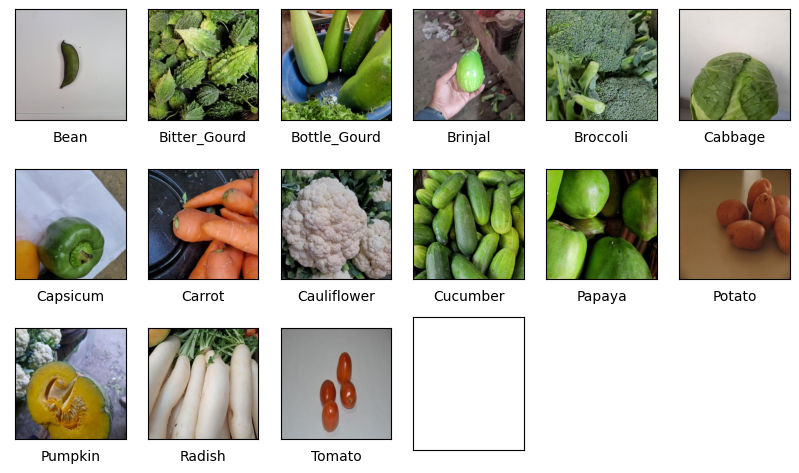

In [3]:
# set each figure to be 10x10
plt.figure(figsize=(10,10))

# show the training dataset
for i in range(30):
    # create a subplot for 30 sections
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # display the image
    plt.imshow(train_img[i*50])
    # display the label
    plt.xlabel(train_lab[i*50])

# display the dataset inside
plt.show()

# Create Neural Network Model